## Install Selenium

In [1]:
pip install -U selenium

     |████████████████████████████████| 968 kB 48 kB/s             
  Attempting uninstall: selenium
    Found existing installation: selenium 4.1.2
    Uninstalling selenium-4.1.2:
      Successfully uninstalled selenium-4.1.2
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Install the Appropriate Driver (We'll use Chromium)

`mv chromedriver.zip /usr/local/bin`

`bin unzip chromedriver.zip`

### Test if everything is setup correctly

In [4]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('http://selenium.dev/')

### Now let's fetch data from our website

We are going to fetch some basic job listing data from a popular South African Job site called [Careers 24](https://www.careers24.com/jobs)

In [6]:
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.careers24.com/jobs')
elems = browser.find_elements(by=By.CLASS_NAME, value='job-card')
print(elems)

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=99.0.4844.51)
Stacktrace:
0   chromedriver                        0x000000010d57b159 chromedriver + 5120345
1   chromedriver                        0x000000010d508b13 chromedriver + 4651795
2   chromedriver                        0x000000010d0f8e68 chromedriver + 392808
3   chromedriver                        0x000000010d0e823e chromedriver + 324158
4   chromedriver                        0x000000010d0e9762 chromedriver + 329570
5   chromedriver                        0x000000010d0e1ffc chromedriver + 299004
6   chromedriver                        0x000000010d0fa2b2 chromedriver + 398002
7   chromedriver                        0x000000010d15ddb2 chromedriver + 806322
8   chromedriver                        0x000000010d14ba33 chromedriver + 731699
9   chromedriver                        0x000000010d1215dd chromedriver + 558557
10  chromedriver                        0x000000010d1224f5 chromedriver + 562421
11  chromedriver                        0x000000010d53838d chromedriver + 4846477
12  chromedriver                        0x000000010d55221c chromedriver + 4952604
13  chromedriver                        0x000000010d557a12 chromedriver + 4975122
14  chromedriver                        0x000000010d552b4a chromedriver + 4954954
15  chromedriver                        0x000000010d52d5b0 chromedriver + 4801968
16  chromedriver                        0x000000010d56cf78 chromedriver + 5062520
17  chromedriver                        0x000000010d56d0ff chromedriver + 5062911
18  chromedriver                        0x000000010d582545 chromedriver + 5150021
19  libsystem_pthread.dylib             0x00007fff203fc8fc _pthread_start + 224
20  libsystem_pthread.dylib             0x00007fff203f8443 thread_start + 15


#### Loop through the first page

In [9]:
for ind, elem in enumerate(elems):
    print(ind, elem.text.splitlines())

0 ['IFRS17 Specialist: Insurance Industry: FTC Cape Town', 'Western Cape', 'Job Type: Contract', 'Posted: 11 Mar 2022', '8 Days left']
1 ['Telesales Team Leader', 'Johannesburg', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '15 Days left']
2 ['Junior Store Buyer 66360', 'East Rand', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '31 Days left']
3 ['Sales Manager 66361', 'Northern Cape', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '31 Days left']
4 ['Wealth Planner - full training provided', 'Gauteng', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '18 Days left']
5 ['Wealth Planner (full training provided)', 'Gauteng Remote', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '18 Days left']
6 ['Sales Representative 66362', 'Northern Cape', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '31 Days left']
7 ['Commercial Manager 66363', 'Johannesburg', 'Job Type: Permanent', 'Posted: 11 Mar 2022', '31 Days left']
8 ['Backend Engineer', 'Johannesburg', 'Job Type: Contract', 'Posted: 11 Mar 2022'

#### We need to click the Next button 30 times to load all the data we want, before looping through it...

In [65]:
from selenium.webdriver.common.action_chains import ActionChains

all_jobs = []
action = ActionChains(browser)
element = browser.find_element(by=By.CLASS_NAME, value='next')

for i in range(10):
    elems = browser.find_elements(by=By.CLASS_NAME, value='job-card')
    for elem in elems:
        all_jobs.append(elem)
    action.click(on_element=element)
    action.perform()

print(len(all_jobs))

100


In [30]:
for ind, elem in enumerate(all_jobs[0:5]):
    print(ind, elem.text.splitlines())

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=99.0.4844.51)
Stacktrace:
0   chromedriver                        0x000000010ad5d159 chromedriver + 5120345
1   chromedriver                        0x000000010aceab13 chromedriver + 4651795
2   chromedriver                        0x000000010a8dae68 chromedriver + 392808
3   chromedriver                        0x000000010a8ddf17 chromedriver + 405271
4   chromedriver                        0x000000010a8dddc1 chromedriver + 404929
5   chromedriver                        0x000000010a8de07c chromedriver + 405628
6   chromedriver                        0x000000010a90aa04 chromedriver + 588292
7   chromedriver                        0x000000010a92db42 chromedriver + 731970
8   chromedriver                        0x000000010a9049b5 chromedriver + 563637
9   chromedriver                        0x000000010a92dc4e chromedriver + 732238
10  chromedriver                        0x000000010a940637 chromedriver + 808503
11  chromedriver                        0x000000010a92da33 chromedriver + 731699
12  chromedriver                        0x000000010a9035dd chromedriver + 558557
13  chromedriver                        0x000000010a9044f5 chromedriver + 562421
14  chromedriver                        0x000000010ad1a38d chromedriver + 4846477
15  chromedriver                        0x000000010ad3421c chromedriver + 4952604
16  chromedriver                        0x000000010ad39a12 chromedriver + 4975122
17  chromedriver                        0x000000010ad34b4a chromedriver + 4954954
18  chromedriver                        0x000000010ad0f5b0 chromedriver + 4801968
19  chromedriver                        0x000000010ad4ef78 chromedriver + 5062520
20  chromedriver                        0x000000010ad4f0ff chromedriver + 5062911
21  chromedriver                        0x000000010ad64545 chromedriver + 5150021
22  libsystem_pthread.dylib             0x00007fff204ca8fc _pthread_start + 224
23  libsystem_pthread.dylib             0x00007fff204c6443 thread_start + 15


In [7]:
all_jobs_with_links = []

for i in range(240):
    link = "https://www.careers24.com/jobs?page=" + str((i+80))
    inner_browser = webdriver.Chrome()
    inner_browser.get(link)
    elems = inner_browser.find_elements(by=By.CLASS_NAME, value='job-card')
    
    for elem in elems:
        link = elem.find_element(by=By.TAG_NAME, value='a')
        split_elem = elem.text.splitlines()
        if (link.get_attribute('href') != None):
            split_elem.append(link.get_attribute('href'))
            all_jobs_with_links.append(split_elem)
            
    inner_browser.close()
    
print(len(all_jobs_with_links))

2400


In [9]:
all_jobs_with_meta = []

for row in all_jobs_with_links:
    inner_browser = webdriver.Chrome()
    inner_browser.get(row[5])
    new_row = row
    details_elem = inner_browser.find_element(by=By.CLASS_NAME, value='detailsList')
    details_ul = details_elem.find_element(by=By.TAG_NAME, value='ul')
    details_items = details_ul.find_elements(by=By.TAG_NAME, value='li')
    for li in details_items:
        new_row.append(li.text)
    all_jobs_with_meta.append(new_row)
    inner_browser.close()
    
#for job in all_jobs_with_meta:
#    print(job)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".detailsList"}
  (Session info: chrome=99.0.4844.51)
Stacktrace:
0   chromedriver                        0x000000010f859159 chromedriver + 5120345
1   chromedriver                        0x000000010f7e6b13 chromedriver + 4651795
2   chromedriver                        0x000000010f3d6e68 chromedriver + 392808
3   chromedriver                        0x000000010f40c181 chromedriver + 610689
4   chromedriver                        0x000000010f40c341 chromedriver + 611137
5   chromedriver                        0x000000010f43ea74 chromedriver + 817780
6   chromedriver                        0x000000010f429b6d chromedriver + 732013
7   chromedriver                        0x000000010f43c637 chromedriver + 808503
8   chromedriver                        0x000000010f429a33 chromedriver + 731699
9   chromedriver                        0x000000010f3ff5dd chromedriver + 558557
10  chromedriver                        0x000000010f4004f5 chromedriver + 562421
11  chromedriver                        0x000000010f81638d chromedriver + 4846477
12  chromedriver                        0x000000010f83021c chromedriver + 4952604
13  chromedriver                        0x000000010f835a12 chromedriver + 4975122
14  chromedriver                        0x000000010f830b4a chromedriver + 4954954
15  chromedriver                        0x000000010f80b5b0 chromedriver + 4801968
16  chromedriver                        0x000000010f84af78 chromedriver + 5062520
17  chromedriver                        0x000000010f84b0ff chromedriver + 5062911
18  chromedriver                        0x000000010f860545 chromedriver + 5150021
19  libsystem_pthread.dylib             0x00007fff203fc8fc _pthread_start + 224
20  libsystem_pthread.dylib             0x00007fff203f8443 thread_start + 15


In [73]:
pip install pandas

     |████████████████████████████████| 11.5 MB 39 kB/s            
     |████████████████████████████████| 17.6 MB 2.2 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

#### Create a new Dataframe from the array

In [12]:
df = pd.DataFrame(
    all_jobs_with_meta, 
    columns=["Title", "Location", "Job Type", "Posted On", "Days Left", "Link", "Location2", "Salary", "Bonus", "Commission", "Job Type2", "Sectors", "Reference"]
)

In [182]:
df

,Title,Location,Job Type,Posted On,Days Left,Link,Location2,Salary,Bonus,Commission,Job Type2,Sectors,Reference
0,INTERNAL SALES CONSULTANT - HARDWARE (MEADOWDA...,East Rand,Job Type: Permanent,Posted: 11 Mar 2022,28 Days left,https://www.careers24.com/jobs/adverts/1852417...,East Rand,Salary: Market Related,Job Type: Permanent,Sectors: Retail,Reference: NEL010232/FL,None,None
1,Sales Representative (Freestate / Eastern Cape),Bloemfontein,Job Type: Permanent,Posted: 11 Mar 2022,25 Days left,https://www.careers24.com/jobs/adverts/1848715...,Bloemfontein,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture Sales,Reference: SW003209/JM,None,None
2,Logistics Creditors Clerk,Cape Winelands,Job Type: Permanent,Posted: 11 Mar 2022,24 Days left,https://www.careers24.com/jobs/adverts/1849225...,Cape Winelands,Salary: Market Related,Job Type: Permanent,Sectors: Finance,Reference: SW003216/JM,None,None
3,Administrative Assistant (Temp),Somerset West,Job Type: Temporary,Posted: 11 Mar 2022,28 Days left,https://www.careers24.com/jobs/adverts/1852253...,Somerset West,Salary: R6 000.00 - R8 000.00 Per Month,Job Type: Temporary,Sectors: Admin,Reference: SW003229/TC,None,None
4,Admin Controller (9:00 â€“ 15:00) - Logistics,Gordons Bay,Job Type: Permanent,Posted: 11 Mar 2022,28 Days left,https://www.careers24.com/jobs/adverts/1852496...,Gordons Bay,Salary: R14 000.00 - R18 000.00 Per Month,Job Type: Permanent,Sectors: Logistics,Reference: SW003232/AM,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wealth Management at IWCP,Gauteng,Job Type: Permanent,Posted: 08 Mar 2022,57 Days left,https://www.careers24.com/jobs/adverts/1850875...,Gauteng,Salary: Market Related,Commision: 100%,Job Type: Permanent,Sectors: Business Management Investment Finance,Reference: copy-copy-copy-1846359,None
1196,Financial Advisor at IWCP,Gauteng,Job Type: Permanent,Posted: 08 Mar 2022,57 Days left,https://www.careers24.com/jobs/adverts/1850874...,Gauteng,Salary: Market Related,Commision: 100%,Job Type: Permanent,Sectors: Business Management Investment Finance,Reference: copy-copy-1846359,None
1197,IT Level 1 Infrastructure Consultants,Durban,Job Type: Permanent,Posted: 08 Mar 2022,57 Days left,https://www.careers24.com/jobs/adverts/1850867...,Durban,Salary: R10 000.00 Per Month,Job Type: Permanent,Sectors: IT,Reference: copy-1844224,None,None
1198,Financial Planner,Johannesburg North,Job Type: Permanent,Posted: 08 Mar 2022,56 Days left,https://www.careers24.com/jobs/adverts/1850866...,Johannesburg North,Salary: Market Related,Job Type: Permanent,Sectors: Insurance Investment Finance,Reference: FP0322,Employment Equity Position,None


#### Drop Columns that we don't need

In [13]:
dropped_df = df.drop(columns=['Link', 'Location2', 'Job Type2'])

In [14]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,None,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Sales,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,Job Type: Permanent,Sectors: IT,None,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Finance,None,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,Job Type: Permanent,Sectors: Finance,None,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,Job Type: Permanent,Sectors: Finance,None,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,Job Type: Permanent,Sectors: Finance,None,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,Job Type: Permanent,Sectors: Finance,None,None


In [15]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
count,794,794,794,794,794,794,794,794,92,6
unique,596,100,5,3,38,192,17,208,25,4
top,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 10 Mar 2022,57 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Finance,Employment Equity Position,Employment Equity Position
freq,10,105,717,384,203,330,685,77,56,2


In [16]:
dropped_df.drop_duplicates()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,None,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Sales,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,Job Type: Permanent,Sectors: IT,None,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Finance,None,None
...,...,...,...,...,...,...,...,...,...,...
785,Procurement Specialist,Gauteng,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R41 667.00 - R45 833.00 Per Month,Job Type: Permanent,Sectors: Procurement,None,None
786,Procurement Officer,Gauteng,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R25 000.00 - R29 167.00 Per Month,Job Type: Permanent,Sectors: Procurement,None,None
787,Senior Supply Chain Controller,Gauteng,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R20 833.00 - R25 000.00 Per Month,Job Type: Permanent,Sectors: Logistics,None,None
788,Logistics Manager Africa,Gauteng,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R79 167.00 - R83 333.00 Per Month,Job Type: Permanent,Sectors: Logistics,None,None


In [17]:
dropped_df.to_csv('master.csv')

#### Remove misplaced Sectors

In [18]:
dropped_df['Sectors'] = dropped_df.apply(lambda x: x['Commission'] if x['Commission'].startswith('Sectors') else x['Sectors'], axis=1)

In [19]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Agriculture,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Sales,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,Job Type: Permanent,Sectors: IT,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,Job Type: Permanent,Sectors: Finance,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,Job Type: Permanent,Sectors: Finance,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,Job Type: Permanent,Sectors: Finance,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,Job Type: Permanent,Sectors: Finance,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,Job Type: Permanent,Sectors: Finance,Sectors: Finance,None


#### Remove Misplaced Bonuses

In [20]:
dropped_df['Bonus'] = dropped_df.apply(lambda x: None if x['Bonus'].startswith('Job') else x['Bonus'], axis=1)

In [21]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,Sectors: Agriculture,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,Sectors: Agriculture,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,Sectors: Sales,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,Sectors: IT,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,Sectors: Finance,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,Sectors: Finance,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,Sectors: Finance,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,Sectors: Finance,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,Sectors: Finance,Sectors: Finance,None


#### Remove misplaced Commission

In [22]:
dropped_df['Commission'] = dropped_df.apply(lambda x: None if not x['Commission'].startswith('Commision') else x['Commission'], axis=1)

In [23]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


#### Replace misplaced References

In [24]:
dropped_df['Reference'] = dropped_df.apply(lambda x: x['Sectors'] if x['Sectors'].startswith('Reference') else x['Reference'], axis=1)

In [25]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


#### Remove misplaced Sectors

In [26]:
dropped_df['Sectors'] = dropped_df.apply(lambda x: None if not x['Sectors'].startswith('Sectors') else x['Sectors'], axis=1)

In [27]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [28]:
dropped_df.head()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None


In [29]:
dropped_df.tail()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None
793,Group Finance Manager,Pietermaritzburg,Job Type: Permanent,Posted: 09 Mar 2022,18 Days left,Salary: R108 333.00 - R125 000.00 Per Month,None,None,Sectors: Finance,None


In [30]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Job Type: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Job Type: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Job Type: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Job Type: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Job Type: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [31]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
count,794,794,794,794,794,794,33,4,765,33
unique,596,100,5,3,38,192,12,2,208,22
top,Financial Accountant,Johannesburg,Job Type: Permanent,Posted: 10 Mar 2022,57 Days left,Salary: Market Related,Commision: + Commission,Commision: YES,Sectors: Finance,Reference: Commercial Insurance Broker
freq,10,105,717,384,203,330,12,2,77,9


#### Clean up the headers in every row...

In [32]:
dropped_df['Job Type'] = dropped_df.apply(lambda x: x['Job Type'].replace('Job Type', '') if x['Job Type'].startswith('Job Type') else x['Job Type'], axis=1)

In [33]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,: Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,: Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,: Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,: Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,: Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,: Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,: Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [34]:
dropped_df['Job Type'] = dropped_df.apply(lambda x: x['Job Type'].replace(':','') if x['Job Type'].startswith(':') else x['Job Type'], axis=1)

In [35]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,Posted: 11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Permanent,Posted: 11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,Posted: 11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Permanent,Posted: 11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,Posted: 09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Permanent,Posted: 09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,Posted: 09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [36]:
dropped_df['Posted On'] = dropped_df.apply(lambda x: x['Posted On'].replace('Posted: ', '') if x['Posted On'].startswith('Posted') else x['Posted On'], axis=1)

In [37]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [38]:
dropped_df['Bonus'] = dropped_df.apply(lambda x: x['Bonus'].replace('Bonus: ', '') if x['Bonus'] is not None else x['Bonus'], axis=1)

In [39]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [42]:
dropped_df['Commission'] = dropped_df.apply(lambda x: x['Commission'].replace('Commision: ', '') if x['Commission'] is not None else x['Commission'], axis=1)

In [43]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Sectors: Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sectors: Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Salary: Market Related,None,None,Sectors: IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Salary: Market Related,None,None,Sectors: Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Sectors: Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Sectors: Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Sectors: Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Sectors: Finance,None


In [44]:
dropped_df['Sectors'] = dropped_df.apply(lambda x: x['Sectors'].replace('Sectors: ', '') if x['Sectors'] is not None else x['Sectors'], axis=1)

In [45]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,None,None,Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Salary: Market Related,None,None,Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Salary: Market Related,None,None,IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Salary: Market Related,None,None,Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,None,None,Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,None,None,Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,None,None,Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,None,None,Finance,None


#### Dropping Irrelevant Fields because of too little data...

In [46]:
dropped_df.drop(columns=['Reference', 'Bonus', 'Commission'])

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,Agriculture
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Salary: Market Related,Agriculture
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Salary: Market Related,Sales
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Salary: Market Related,IT
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Salary: Market Related,Finance
...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R50 000.00 - R54 167.00 Per Month,Finance
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Salary: R75 000.00 - R79 167.00 Per Month,Finance
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Salary: R62 500.00 - R66 667.00 Per Month,Finance
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Salary: R50 000.00 - R58 333.00 Per Month,Finance


#### A little sanitization of the Salary column...

In [47]:
dropped_df['Salary'] = dropped_df.apply(lambda x: x['Salary'].replace('Salary: ', '') if x['Salary'].startswith('Salary') else x['Commission'], axis=1)

In [48]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,None,None,Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,None,None,Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,None,None,Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,None,None,IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,None,None,Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00 Per Month,None,None,Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00 Per Month,None,None,Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00 Per Month,None,None,Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00 Per Month,None,None,Finance,None


In [49]:
dropped_df['Salary'] = dropped_df.apply(lambda x: x['Salary'].replace('Per Month', '') if "Month" in x['Salary'] else x['Salary'], axis=1)

In [50]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,None,None,Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,None,None,Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,None,None,Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,None,None,IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,None,None,Finance,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00,None,None,Finance,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00,None,None,Finance,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00,None,None,Finance,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00,None,None,Finance,None


In [56]:
dropped_df['Salary'] = dropped_df.apply(lambda x: x['Salary'].replace("\(Negotiable\)", '') if "Month" in x['Salary'] else x['Salary'], axis=1)

In [52]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Bonus,Commission,Sectors,Reference
count,794,794,794,794,794,794,33,4,765,33
unique,596,100,5,3,38,192,12,2,208,22
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Market Related,Commision: + Commission,YES,Finance,Reference: Commercial Insurance Broker
freq,10,105,717,384,203,330,12,2,77,9


In [53]:
dropped_df = dropped_df.drop(columns=['Reference', 'Bonus', 'Commission'])

In [54]:
dropped_df.tail(100)

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors
694,Betting Clerks (FTC X5) - Greyville Race Course,Durban,Contract,09 Mar 2022,28 Days left,Market Related,Hospitality General
695,Proxy Product Owner,Midrand,Contract,09 Mar 2022,57 Days left,R96 000.00 - R120 000.00,Automotive
696,Systems Trainer,Sandton,Permanent,09 Mar 2022,6 Days left,Market Related,Education Travel & Tourism
697,Senior DevOps Engineer,Midrand,Contract,09 Mar 2022,57 Days left,R64 000.00 - R96 000.00,Automotive
698,Senior Civil Designers,Sandton,Contract,09 Mar 2022,19 Days left,R64 000.00 - R88 000.00,Engineering
...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00,Finance
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00,Finance
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00,Finance
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00,Finance


In [62]:
dropped_df['Salary'] = dropped_df.apply(lambda x: x['Salary'].replace('(Negotiable)', '') if "Negotiable" in x['Salary'] else x['Salary'], axis=1)

#### Getting a feel of the sampled data...

In [65]:
dropped_df.sample(n=100)

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors
21,Advisor: Ethical Support and Audit Assurance,Cape Winelands,Permanent,11 Mar 2022,25 Days left,Market Related,Agriculture Human Resources Legal
297,Business Development Officer | Cape Town,Cape Town,Permanent,10 Mar 2022,59 Days left,R20 000.00 - R40 000.00,None
370,Accountant - Construction Industry,Cape Town Northern Suburbs,Permanent,10 Mar 2022,27 Days left,Market Related,Finance
634,Stock controller,Pretoria North,Permanent,09 Mar 2022,57 Days left,Market Related,Logistics General
167,Education Specialist (PL2),Limpopo,Permanent,10 Mar 2022,13 Days left,,Education
...,...,...,...,...,...,...,...
471,Commercial Administrator,Durban,Permanent,09 Mar 2022,11 Days left,On Application,Admin
365,Loan Set Department Technician,Gauteng,Permanent,10 Mar 2022,20 Days left,Market Related,Medical
10,Engineering Executive/Manager,South Africa,Permanent,11 Mar 2022,18 Days left,Market Related,Engineering
635,Bill of Costing Officer: Industrial Engineering,Western Cape,Permanent,09 Mar 2022,56 Days left,R40 000.00 - R45 000.00,Engineering


In [66]:
dropped_df.sample(n=12)

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors
678,Guest Relations Officer,Stellenbosch,Permanent,09 Mar 2022,57 Days left,Market Related,Entertainment Hospitality Automotive
358,SAP Specialist,Johannesburg,Permanent,10 Mar 2022,28 Days left,R79 167.00 - R91 667.00,Finance
153,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRI...,Cape Town,Permanent,10 Mar 2022,58 Days left,R9 000.00,Accounting Admin
26,Sales Advisor (Northern Suburbs),Bellville,Permanent,11 Mar 2022,25 Days left,Market Related,Retail
534,F&I Business Manager - Nelspruit,Mbombela,Permanent,09 Mar 2022,59 Days left,Market Related,Sales Automotive
329,Branch Manager,East Rand,Permanent,10 Mar 2022,58 Days left,R450 000.00 - R550 000.00,Insurance
197,Logistics Internship,East Rand Remote,Internship,10 Mar 2022,6 Days left,Market Related,Manufacturing
674,Senior Travel Designer - Trade & Media,Sandton,Permanent,09 Mar 2022,57 Days left,Market Related,Travel & Tourism Consulting
288,Commercial Broker,KwaZulu-Natal,Permanent,10 Mar 2022,59 Days left,R20 000.00 - R40 000.00,None
209,LegalServices,South Africa,Permanent,10 Mar 2022,13 Days left,R105 829.00,Government & Parastatals


In [67]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors
count,794,794,794,794,794,794,765
unique,596,100,5,3,38,192,208
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Market Related,Finance
freq,10,105,717,384,203,330,77


In [68]:
dropped_df['Min Salary'] = dropped_df.apply(lambda x: x['Salary'].split('-')[0] if "-" in x['Salary'] else None, axis=1)

In [69]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,Sales,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,IT,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,Finance,None
...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00,Finance,R50 000.00
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00,Finance,R75 000.00
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00,Finance,R62 500.00
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00,Finance,R50 000.00


In [70]:
dropped_df['Max Salary'] = dropped_df.apply(lambda x: x['Salary'].split('-')[1] if "-" in x['Salary'] else None, axis=1)

In [71]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,Sales,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,IT,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,Finance,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00,Finance,R50 000.00,R54 167.00
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00,Finance,R75 000.00,R79 167.00
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00,Finance,R62 500.00,R66 667.00
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00,Finance,R50 000.00,R58 333.00


In [72]:
dropped_df.query('Salary.str.startswith("Up")')

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary


In [230]:
dropped_df['Max Salary'] = dropped_df.apply(lambda x: x['Salary'].replace('Up to ', '') if x['Salary'].startswith('Up') else x['Max Salary'], axis=1)

In [231]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
0,INTERNAL SALES CONSULTANT - HARDWARE (MEADOWDA...,East Rand,Permanent,11 Mar 2022,28 Days left,Market Related,Retail,None,None
1,Sales Representative (Freestate / Eastern Cape),Bloemfontein,Permanent,11 Mar 2022,25 Days left,Market Related,Agriculture Sales,None,None
2,Logistics Creditors Clerk,Cape Winelands,Permanent,11 Mar 2022,24 Days left,Market Related,Finance,None,None
3,Administrative Assistant (Temp),Somerset West,Temporary,11 Mar 2022,28 Days left,R6 000.00 - R8 000.00,Admin,R6 000.00,R8 000.00
4,Admin Controller (9:00 â€“ 15:00) - Logistics,Gordons Bay,Permanent,11 Mar 2022,28 Days left,R14 000.00 - R18 000.00,Logistics,R14 000.00,R18 000.00
...,...,...,...,...,...,...,...,...,...
1195,Wealth Management at IWCP,Gauteng,Permanent,08 Mar 2022,57 Days left,Market Related,None,None,None
1196,Financial Advisor at IWCP,Gauteng,Permanent,08 Mar 2022,57 Days left,Market Related,None,None,None
1197,IT Level 1 Infrastructure Consultants,Durban,Permanent,08 Mar 2022,57 Days left,R10 000.00,IT,None,None
1198,Financial Planner,Johannesburg North,Permanent,08 Mar 2022,56 Days left,Market Related,Insurance Investment Finance,None,None


In [73]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
count,794,794,794,794,794,794,765,348,348
unique,596,100,5,3,38,192,208,72,97
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Market Related,Finance,R20 000.00,R40 000.00
freq,10,105,717,384,203,330,77,36,21


In [74]:
dropped_df.query('Salary.str.startswith("Market Related")')

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,Sales,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,IT,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,Finance,None,None
...,...,...,...,...,...,...,...,...,...
766,Post Basic Qualified Pharmacist Assistant - On...,Johannesburg,Permanent,09 Mar 2022,26 Days left,Market Related,Management Pharmaceutical,None,None
767,Social Media Community Builder,Sandton,Permanent,09 Mar 2022,57 Days left,Market Related,Marketing,None,None
768,Pharmacist - Oncology - Linksfield,Johannesburg,Permanent,09 Mar 2022,26 Days left,Market Related,General Pharmaceutical,None,None
778,Creditors Clerk,Johannesburg,Permanent,09 Mar 2022,27 Days left,Market Related,Finance,None,None


#### Query for salaries that are not a range

In [75]:
dropped_df.query('Salary.str.match("^R.*0") and not Salary.str.match("^.*-.*$")')

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
62,Heat Pump Service Technician,Cape Flats,Permanent,10 Mar 2022,58 Days left,R20 000.00,Engineering Technical,None,None
73,"External Sales Rep - Cape Town - R15,000 per m...",Cape Town,Permanent,10 Mar 2022,58 Days left,R15 000.00,None,None,None
82,SCADA Technician,Mbombela,Permanent,10 Mar 2022,19 Days left,R47 000.00,Engineering,None,None
99,Quality Controller,Gauteng,Temporary,10 Mar 2022,58 Days left,R5 000.00,FMCG,None,None
100,Panel shop Parts Buyer,Gauteng,Permanent,10 Mar 2022,12 Days left,R40.00,Automotive,None,None
107,Senior Operations/ Facility Manager - must hav...,Pretoria,Permanent,10 Mar 2022,19 Days left,R50 000.00,Property,None,None
122,Validations Officer,Roodepoort,Permanent,10 Mar 2022,19 Days left,R25 000.00,Pharmaceutical,None,None
152,"SALES CONSULTANT - NORTHERN SUBURBS - R270,000...",Cape Town Northern Suburbs,Permanent,10 Mar 2022,58 Days left,R22 500.00,Sales,None,None
153,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRI...,Cape Town,Permanent,10 Mar 2022,58 Days left,R9 000.00,Accounting Admin,None,None
158,OUTsurance Broker (Durban),Durban,Permanent,10 Mar 2022,58 Days left,R1 000.00,Management,None,None


In [76]:
dropped_df['Min Salary'] = dropped_df.apply(lambda x: x['Salary'] if "+" in x['Salary'] and x['Salary'].startswith("R") else x['Min Salary'], axis=1)

In [77]:
dropped_df

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,Sales,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,IT,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,Finance,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,R50 000.00 - R54 167.00,Finance,R50 000.00,R54 167.00
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,R75 000.00 - R79 167.00,Finance,R75 000.00,R79 167.00
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,R62 500.00 - R66 667.00,Finance,R62 500.00,R66 667.00
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,R50 000.00 - R58 333.00,Finance,R50 000.00,R58 333.00


In [78]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary
count,794,794,794,794,794,794,765,351,348
unique,596,100,5,3,38,192,208,75,97
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Market Related,Finance,R20 000.00,R40 000.00
freq,10,105,717,384,203,330,77,36,21


In [79]:
dropped_df['Actual Salary'] = dropped_df.apply(lambda x: x['Salary'] if not "+" in x['Salary'] and x['Salary'].startswith("R") and not "-" in x['Salary'] else None, axis=1)

In [80]:
dropped_df.describe()

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary,Actual Salary
count,794,794,794,794,794,794,765,351,348,29
unique,596,100,5,3,38,192,208,75,97,21
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Market Related,Finance,R20 000.00,R40 000.00,R1 500 000.00
freq,10,105,717,384,203,330,77,36,21,5


In [81]:
dropped_df.drop_duplicates()

,Title,Location,Job Type,Posted On,Days Left,Salary,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Market Related,Agriculture,None,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Market Related,Sales,None,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,Market Related,IT,None,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Market Related,Finance,None,None,None
...,...,...,...,...,...,...,...,...,...,...
785,Procurement Specialist,Gauteng,Permanent,09 Mar 2022,28 Days left,R41 667.00 - R45 833.00,Procurement,R41 667.00,R45 833.00,None
786,Procurement Officer,Gauteng,Permanent,09 Mar 2022,28 Days left,R25 000.00 - R29 167.00,Procurement,R25 000.00,R29 167.00,None
787,Senior Supply Chain Controller,Gauteng,Permanent,09 Mar 2022,28 Days left,R20 833.00 - R25 000.00,Logistics,R20 833.00,R25 000.00,None
788,Logistics Manager Africa,Gauteng,Permanent,09 Mar 2022,28 Days left,R79 167.00 - R83 333.00,Logistics,R79 167.00,R83 333.00,None


In [82]:
master = dropped_df.drop(columns=['Salary'])

In [83]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,None,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,None,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,None,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,R50 000.00,R54 167.00,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,R75 000.00,R79 167.00,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,R62 500.00,R66 667.00,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,R50 000.00,R58 333.00,None


In [90]:
master['Min Salary'] = master.apply(lambda x: x['Min Salary'].replace(' ', '') if x['Min Salary'] is not None else x['Min Salary'], axis=1)

In [91]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,None,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,None,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,None,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,R50000.00,R54 167.00,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,R75000.00,R79 167.00,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,R62500.00,R66 667.00,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,R50000.00,R58 333.00,None


In [92]:
master['Min Salary'] = master.apply(lambda x: x['Min Salary'].replace('R', '') if x['Min Salary'] is not None else x['Min Salary'], axis=1)

In [93]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,None,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,None,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,None,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,None,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,50000.00,R54 167.00,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,75000.00,R79 167.00,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,62500.00,R66 667.00,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,50000.00,R58 333.00,None


In [97]:
master['Min Salary'] = master.apply(lambda x: x['Min Salary'].replace('+', '') if x['Min Salary'] is not None else x['Min Salary'], axis=1)

In [98]:
master['Min Salary'] = master.apply(lambda x: float(x['Min Salary']) if x['Min Salary'] is not None else x['Min Salary'], axis=1)

In [99]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,None,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,None,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,NaN,None,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,NaN,None,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,NaN,None,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,50000.0,R54 167.00,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,75000.0,R79 167.00,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,62500.0,R66 667.00,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,50000.0,R58 333.00,None


In [100]:
master['Max Salary'] = master.apply(lambda x: x['Max Salary'].replace(' ', '') if x['Max Salary'] is not None else x['Max Salary'], axis=1)
master['Max Salary'] = master.apply(lambda x: x['Max Salary'].replace('R', '') if x['Max Salary'] is not None else x['Max Salary'], axis=1)
master['Max Salary'] = master.apply(lambda x: float(x['Max Salary']) if x['Max Salary'] is not None else x['Max Salary'], axis=1)

In [101]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,NaN,NaN,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,NaN,NaN,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,50000.0,54167.0,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,75000.0,79167.0,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,62500.0,66667.0,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,50000.0,58333.0,None


In [103]:
master['Actual Salary'] = master.apply(lambda x: x['Actual Salary'].replace(' ', '') if x['Actual Salary'] is not None else x['Actual Salary'], axis=1)
master['Actual Salary'] = master.apply(lambda x: x['Actual Salary'].replace('R', '') if x['Actual Salary'] is not None else x['Actual Salary'], axis=1)
master['Actual Salary'] = master.apply(lambda x: float(x['Actual Salary']) if x['Actual Salary'] is not None else x['Actual Salary'], axis=1)

In [104]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary,Actial Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN,None
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN,None
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,NaN,NaN,NaN,None
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,NaN,NaN,NaN,None
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,50000.0,54167.0,NaN,None
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,75000.0,79167.0,NaN,None
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,62500.0,66667.0,NaN,None
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,50000.0,58333.0,NaN,None


In [105]:
master = master.drop(columns=["Actial Salary"])

In [106]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,NaN,NaN,NaN
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,NaN,NaN,NaN
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,50000.0,54167.0,NaN
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,75000.0,79167.0,NaN
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,62500.0,66667.0,NaN
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,50000.0,58333.0,NaN


In [108]:
master.sample(20)

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
175,Master Production Scheduler Supervisor,Gauteng,Permanent,10 Mar 2022,58 Days left,Manufacturing,25000.0,41667.0,NaN
641,Project Specialist Administrator,Umhlanga,Permanent,09 Mar 2022,3 Days left,Hospitality General,NaN,NaN,NaN
421,Debtors and Creditors Clerk,Cape Town Northern Suburbs,Permanent,10 Mar 2022,27 Days left,Finance,NaN,NaN,NaN
49,Senior Specialist: Business Analysis,Johannesburg,Permanent,10 Mar 2022,6 Days left,Logistics Security,NaN,NaN,NaN
160,Digital Marketing and Design Coordinator,Stellenbosch,Permanent,10 Mar 2022,58 Days left,Marketing Media Technology,NaN,NaN,NaN
232,Junior Sommelier,Cape Winelands,Permanent,10 Mar 2022,4 Days left,Hospitality,NaN,NaN,NaN
685,Maintenance Technician,West Rand,Contract,09 Mar 2022,57 Days left,Mining,NaN,NaN,NaN
670,Finance Admin Clerk,Cape Town,Contract,09 Mar 2022,13 Days left,Admin,7000.0,10000.0,NaN
184,SOCIAL AUXILIARY WORKER GRADE 1,Western Cape,Contract,10 Mar 2022,6 Days left,Medical,NaN,NaN,NaN
223,General Manager,South Africa,Permanent,10 Mar 2022,58 Days left,FMCG Chemical,NaN,NaN,NaN


In [109]:
master.to_csv("cleaned_master.csv")

In [110]:
master['Min Salary'] = master.apply(lambda x: x['Actual Salary'] if x['Actual Salary'] is not None else x['Min Salary'], axis=1)

In [111]:
master

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary,Actual Salary
0,TECHNICAL MARKETER â€“ PASTURE SEED,KwaZulu-Natal,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN
1,TECHNICAL LEAD PASTURE,Pretoria,Permanent,11 Mar 2022,109 Days left,Agriculture,NaN,NaN,NaN
2,Sales Person,Durban North,Permanent,11 Mar 2022,18 Days left,Sales,NaN,NaN,NaN
3,Senior Analyst: Dev Ops,Johannesburg,Permanent,11 Mar 2022,9 Days left,IT,NaN,NaN,NaN
4,Debtors Clerk,Cape Town,Permanent,11 Mar 2022,5 Days left,Finance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
789,Financial Accountant,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,NaN,54167.0,NaN
790,Senior Financial Business Partner,Johannesburg,Permanent,09 Mar 2022,28 Days left,Finance,NaN,79167.0,NaN
791,Financial Manager,Johannesburg,Permanent,09 Mar 2022,27 Days left,Finance,NaN,66667.0,NaN
792,Immediately available CA(SA) Accountants,Johannesburg,Permanent,09 Mar 2022,19 Days left,Finance,NaN,58333.0,NaN


In [112]:
master = master.drop(columns=['Actual Salary'])

In [113]:
master.describe()

,Min Salary,Max Salary
count,2.900000e+01,3.480000e+02
mean,2.851688e+05,1.145963e+05
std,5.650971e+05,3.172158e+05
min,4.000000e+01,7.100000e+01
25%,1.500000e+04,2.500000e+04
50%,2.300000e+04,4.000000e+04
75%,8.943200e+04,7.083300e+04
max,1.500000e+06,4.533852e+06


In [115]:
master.sample(50)

,Title,Location,Job Type,Posted On,Days Left,Sectors,Min Salary,Max Salary
270,"Accounts Assistant (Atlantis, Cape Town) R14,0...",West Coast,Permanent,10 Mar 2022,59 Days left,Accounting Admin Finance,NaN,18000.0
409,Senior Financial Business Partner,Johannesburg,Permanent,10 Mar 2022,28 Days left,Finance,NaN,79167.0
187,CLINICAL NURSE PRACTITIONER GRADE 1 (PHC),Western Cape,Permanent,10 Mar 2022,6 Days left,Medical,NaN,NaN
658,Resident Engineer (Roads),Northern Cape,Permanent,09 Mar 2022,57 Days left,Engineering,NaN,100000.0
209,LegalServices,South Africa,Permanent,10 Mar 2022,13 Days left,Government & Parastatals,105829.0,NaN
605,Administrator,Pretoria,Permanent,09 Mar 2022,3 Hours left,Admin Security,NaN,NaN
39,Head of Finance Business Partner â€“ Consumer ...,Johannesburg,Permanent,11 Mar 2022,18 Days left,Finance,NaN,NaN
294,Financial Planning & Analysis Manager,Sandton,Permanent,10 Mar 2022,58 Days left,Insurance,NaN,900000.0
490,SAP ABAP Developer,KwaZulu-Natal Remote,Permanent,09 Mar 2022,57 Days left,IT,NaN,136000.0
133,"Security Officer Grade C,B,A - Residing in the...",Cape Town,Permanent,10 Mar 2022,58 Days left,Security Management,NaN,NaN


In [2]:
cleaned_titles = pd.read_csv("cleaned_title_master.csv")

In [3]:
cleaned_titles

,Title,Location,Job Type,Posted On,Days Left,Main sector,Job Sector,Min Salary,Max Salary,Actual Salary
0,Account Assistant,Pinetown,Contract,10 Mar 2022,58 Days left,Accounting,Finance,1000.0,1333.0,NaN
1,CIPC Statutory Assistant,Hatfield,Permanent,10 Mar 2022,58 Days left,Accounting,Finance,13000.0,17000.0,NaN
2,Credit Controller - Benoni,Benoni,Permanent,10 Mar 2022,58 Days left,Accounting,Finance,15000.0,18000.0,NaN
3,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRIAL,Cape Town,Permanent,10 Mar 2022,58 Days left,Accounting Admin,Administrator,NaN,NaN,9000.0
4,Senior Rental Administrator,Swellendam,Permanent,10 Mar 2022,58 Days left,Accounting Admin Finance,Finance,18000.0,20000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
789,Catering Manager - Pretoria region,Pretoria,Permanent,09 Mar 2022,58 Days left,NaN,Hospitality,NaN,NaN,NaN
790,Sales Executive (Courier),Brackenfell,Permanent,09 Mar 2022,57 Days left,NaN,Sales,15000.0,25000.0,NaN
791,E-Commerce Sales Consultant,Cape Town,Permanent,09 Mar 2022,58 Days left,NaN,Sales,1000.0,15000.0,NaN
792,Sales Consultant,Gauteng,Contract,09 Mar 2022,57 Days left,NaN,Sales,NaN,NaN,15000.0


In [4]:
cleaned_sectors['Min Salary']

NameError: name 'cleaned_sectors' is not defined

In [3]:
import math

In [4]:
cleaned_titles['Min Salary'] = cleaned_titles.apply(lambda x: x['Min Salary']  if math.isnan(x['Actual Salary']) is True  else x['Actual Salary'], axis=1)

In [7]:
cleaned_titles.sample(60)

,Title,Location,Job Type,Posted On,Days Left,Main sector,Job Sector,Min Salary,Max Salary,Actual Salary
388,Machine Operator PPT (Night Shift),Midrand,Permanent,10 Mar 2022,28 Days left,General Retail,Retail,NaN,NaN,NaN
71,Intermediate Product Co-Ordinator,Sandton,Permanent,09 Mar 2022,6 Days left,Admin Travel & Tourism,Admin,NaN,NaN,NaN
291,Group Accountant,Johannesburg,Permanent,10 Mar 2022,28 Days left,Finance,Finance,37500.0,41667.0,NaN
231,CNC operator/ setter,North West,Permanent,11 Mar 2022,19 Days left,Engineering Manufacturing,Manufacturing,NaN,NaN,NaN
560,Agile Delivery Lead,Gauteng,Permanent,10 Mar 2022,58 Days left,IT Insurance,IT,NaN,NaN,NaN
591,Supply Chain Excellence Manager,Gauteng,Permanent,09 Mar 2022,28 Days left,Logistics,Logistics,41667.0,45833.0,NaN
38,Business Manager - Legal / Compliance - Somers...,Somerset West,Permanent,10 Mar 2022,59 Days left,Admin Business Management Legal,Admin,NaN,NaN,NaN
81,DAIRY MANAGER,Sudan,Permanent,11 Mar 2022,140 Days left,Agriculture,Agriculture,NaN,NaN,NaN
532,iOS Mobile Developer,Gauteng,Temporary,09 Mar 2022,57 Days left,IT,IT,80000.0,112000.0,NaN
507,Asset Financing Sales Consultant (Vehicles),Cape Town,Permanent,09 Mar 2022,2 Days left,Investment Sales,Investment,NaN,NaN,NaN


In [5]:
cleaned_titles = cleaned_titles.drop(columns=['Actual Salary'])

In [9]:
cleaned_titles

,Title,Location,Job Type,Posted On,Days Left,Main sector,Job Sector,Min Salary,Max Salary
0,Account Assistant,Pinetown,Contract,10 Mar 2022,58 Days left,Accounting,Finance,1000.0,1333.0
1,CIPC Statutory Assistant,Hatfield,Permanent,10 Mar 2022,58 Days left,Accounting,Finance,13000.0,17000.0
2,Credit Controller - Benoni,Benoni,Permanent,10 Mar 2022,58 Days left,Accounting,Finance,15000.0,18000.0
3,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRIAL,Cape Town,Permanent,10 Mar 2022,58 Days left,Accounting Admin,Administrator,9000.0,NaN
4,Senior Rental Administrator,Swellendam,Permanent,10 Mar 2022,58 Days left,Accounting Admin Finance,Finance,18000.0,20000.0
...,...,...,...,...,...,...,...,...,...
789,Catering Manager - Pretoria region,Pretoria,Permanent,09 Mar 2022,58 Days left,NaN,Hospitality,NaN,NaN
790,Sales Executive (Courier),Brackenfell,Permanent,09 Mar 2022,57 Days left,NaN,Sales,15000.0,25000.0
791,E-Commerce Sales Consultant,Cape Town,Permanent,09 Mar 2022,58 Days left,NaN,Sales,1000.0,15000.0
792,Sales Consultant,Gauteng,Contract,09 Mar 2022,57 Days left,NaN,Sales,15000.0,NaN


In [6]:
cleaned_titles = cleaned_titles.drop(columns=['Main sector'])

In [11]:
cleaned_titles

,Title,Location,Job Type,Posted On,Days Left,Job Sector,Min Salary,Max Salary
0,Account Assistant,Pinetown,Contract,10 Mar 2022,58 Days left,Finance,1000.0,1333.0
1,CIPC Statutory Assistant,Hatfield,Permanent,10 Mar 2022,58 Days left,Finance,13000.0,17000.0
2,Credit Controller - Benoni,Benoni,Permanent,10 Mar 2022,58 Days left,Finance,15000.0,18000.0
3,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRIAL,Cape Town,Permanent,10 Mar 2022,58 Days left,Administrator,9000.0,NaN
4,Senior Rental Administrator,Swellendam,Permanent,10 Mar 2022,58 Days left,Finance,18000.0,20000.0
...,...,...,...,...,...,...,...,...
789,Catering Manager - Pretoria region,Pretoria,Permanent,09 Mar 2022,58 Days left,Hospitality,NaN,NaN
790,Sales Executive (Courier),Brackenfell,Permanent,09 Mar 2022,57 Days left,Sales,15000.0,25000.0
791,E-Commerce Sales Consultant,Cape Town,Permanent,09 Mar 2022,58 Days left,Sales,1000.0,15000.0
792,Sales Consultant,Gauteng,Contract,09 Mar 2022,57 Days left,Sales,15000.0,NaN


In [7]:
cleaned_titles.describe(include="all")

,Title,Location,Job Type,Posted On,Days Left,Job Sector,Min Salary,Max Salary
count,794,794,794,794,794,794,3.810000e+02,3.480000e+02
unique,592,100,5,3,38,56,NaN,NaN
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Finance,NaN,NaN
freq,10,105,717,384,203,108,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.126629e+05,1.145963e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,3.022170e+05,3.172158e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+01,7.100000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04,2.500000e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+04,4.000000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.250000e+04,7.083300e+04


In [8]:
pd.set_option('float_format', '{:f}'.format)

In [14]:
cleaned_titles.describe(include='all')

,Title,Location,Job Type,Posted On,Days Left,Job Sector,Min Salary,Max Salary
count,794,794,794,794,794,794,381.000000,348.000000
unique,592,100,5,3,38,56,NaN,NaN
top,Financial Accountant,Johannesburg,Permanent,10 Mar 2022,57 Days left,Finance,NaN,NaN
freq,10,105,717,384,203,108,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,112662.897638,114596.278736
std,NaN,NaN,NaN,NaN,NaN,NaN,302217.021934,317215.797547
min,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,71.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,17000.000000,25000.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,30000.000000,40000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,62500.000000,70833.000000


In [15]:
cleaned_titles

,Title,Location,Job Type,Posted On,Days Left,Job Sector,Min Salary,Max Salary
0,Account Assistant,Pinetown,Contract,10 Mar 2022,58 Days left,Finance,1000.000000,1333.000000
1,CIPC Statutory Assistant,Hatfield,Permanent,10 Mar 2022,58 Days left,Finance,13000.000000,17000.000000
2,Credit Controller - Benoni,Benoni,Permanent,10 Mar 2022,58 Days left,Finance,15000.000000,18000.000000
3,RECEPTION / PASTEL ACCOUNTS - AIRPORT INDUSTRIAL,Cape Town,Permanent,10 Mar 2022,58 Days left,Administrator,9000.000000,NaN
4,Senior Rental Administrator,Swellendam,Permanent,10 Mar 2022,58 Days left,Finance,18000.000000,20000.000000
...,...,...,...,...,...,...,...,...
789,Catering Manager - Pretoria region,Pretoria,Permanent,09 Mar 2022,58 Days left,Hospitality,NaN,NaN
790,Sales Executive (Courier),Brackenfell,Permanent,09 Mar 2022,57 Days left,Sales,15000.000000,25000.000000
791,E-Commerce Sales Consultant,Cape Town,Permanent,09 Mar 2022,58 Days left,Sales,1000.000000,15000.000000
792,Sales Consultant,Gauteng,Contract,09 Mar 2022,57 Days left,Sales,15000.000000,NaN


### Top Appearing Job Titles

In [9]:
cleaned_titles['Title'].value_counts()

Financial Accountant                 10
Junior Financial Planner              8
Commercial Broker                     8
Intermediate Project Manager          6
Fitter                                6
                                     ..
Integration Solution Architect        1
International Buyer - Incoterms       1
Industrial Engineering Specialist     1
Mechanical Design Engineer            1
New Business Sales Consultant         1
Name: Title, Length: 592, dtype: int64

### Mean Salaries for Financial Accountants

In [17]:
cleaned_titles.groupby("Title").get_group("Financial Accountant").mean()

<ipython-input-17-79da1c724e82>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cleaned_titles.groupby("Title").get_group("Financial Accountant").mean()


Min Salary   237129.666667
Max Salary   261851.888889
dtype: float64

### Mean Salaries for Junior Financial Planners

In [18]:
cleaned_titles.groupby("Title").get_group("Junior Financial Planner").mean()

<ipython-input-18-be4c4ba56199>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cleaned_titles.groupby("Title").get_group("Junior Financial Planner").mean()


Min Salary   21250.000000
Max Salary   30833.250000
dtype: float64

### Mean Salaries for Junior Financial Planners

In [19]:
cleaned_titles.groupby("Title").get_group("Commercial Broker").mean()

<ipython-input-19-d5221037d4f7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cleaned_titles.groupby("Title").get_group("Commercial Broker").mean()


Min Salary   20000.000000
Max Salary   40000.000000
dtype: float64

### Top 10 Frequently Appearing Sectors

In [20]:
cleaned_titles['Job Sector'].value_counts().nlargest(10)

Finance                     108
IT                           85
Insurance                    68
Engineering                  59
Sales                        55
Admin                        50
Manufacturing                35
Government & Parastatals     30
Hospitality                  22
Medical                      21
Name: Job Sector, dtype: int64

In [32]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pd.options.plotting.backend = "plotly"

In [11]:
freq_sectors = cleaned_titles['Job Sector'].value_counts().nlargest(10)

In [12]:
freq_sectors

Finance                     108
IT                           85
Insurance                    68
Engineering                  59
Sales                        55
Admin                        50
Manufacturing                35
Government & Parastatals     30
Hospitality                  22
Medical                      21
Name: Job Sector, dtype: int64

In [18]:
fig1 = freq_sectors.plot.bar()

In [22]:
fig1.show()

### Top 10 Frequent Job Locations

In [28]:
freq_loc = cleaned_titles['Location'].value_counts().nlargest(10)

In [29]:
freq_loc

Johannesburg                  105
Gauteng                        88
Cape Town                      64
Western Cape                   41
Pretoria                       32
Durban                         24
Sandton                        24
Limpopo                        22
Cape Town Northern Suburbs     22
Cape Winelands                 20
Name: Location, dtype: int64

In [30]:
fig2 = freq_loc.plot.bar()

In [31]:
fig2.show()

In [56]:
grouped_jobs = cleaned_titles.groupby("Title").mean().nlargest(columns=["Max Salary"], n=10)

In [59]:
fig3 = grouped_jobs.plot.bar(barmode="group")

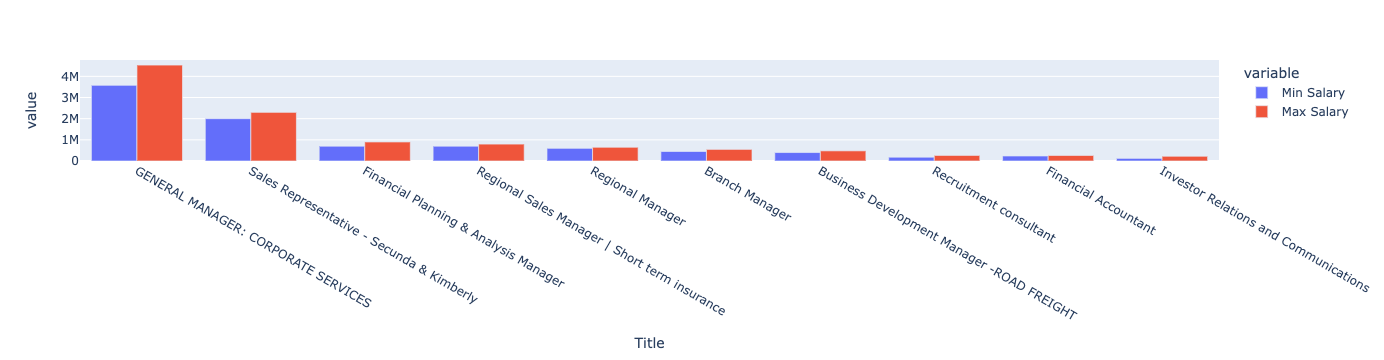

In [60]:
fig3.show()

In [61]:
grouped_locs = cleaned_titles.groupby("Location").mean().nlargest(columns=["Max Salary"], n=10)

In [62]:
fig4 = grouped_locs.plot.bar(barmode="group")

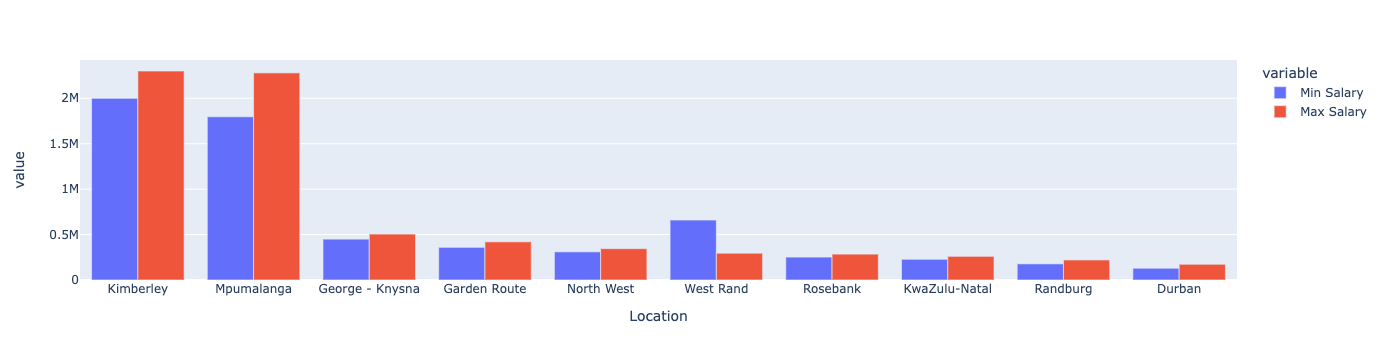

In [63]:
fig4.show()